The piece of code below is meant for cleaning the data, dropping any NaN values, and merging dataframes to prep it for analysis.

In [8]:
# import pandas library to handle large datasets
import pandas as pd
# import numpy library to perform analysis on datasets
import numpy as np
# import matplotlib libary to plot the datasets
import matplotlib.pyplot as plt
# import LinearRegression from sklearn library to perform statistical analysis
from sklearn.linear_model import LinearRegression

# separate .csv files into own variables first
cabData = pd.read_csv("Cab_Data.csv")
customerData = pd.read_csv("Customer_ID.csv")
transactionData = pd.read_csv("Transaction_ID.csv")
cityData = pd.read_csv("City.csv")

# merge Cab_Data.csv and Transaction_ID.csv because of common column: Transaction ID
masterData = pd.merge(cabData, transactionData, on = "Transaction ID", how = "inner")
# merge previous masterData and Customer_ID.csv because of common column: Customer ID
masterData = pd.merge(masterData, customerData, on = "Customer ID", how = "inner")
# merge previous masterData and City.csv because of common column: City
masterData = pd.merge(masterData, cityData, on = "City", how = "inner")

# if masterData contains NaN values, drop those rows
if (masterData.isna().sum().sum() != 0):
    masterData = masterData.dropna()

# if masterData contains duplicate rows (duplicated transaction IDs), 
# delete them since transaction IDs are unique to each transaction
masterData = masterData.drop_duplicates()

# Population's dtype is object, should be int64
masterData["Population"] = masterData["Population"].str.replace(",", "").astype(int)

# Users's dtype is object, should be int64
masterData["Users"] = masterData["Users"].str.replace(",", "").astype(int)

The piece of code below is meant for analyzing and graphing the data between each company to graph it.

Visualizations:
1. KM Travelled for each Company (Bar Graph)
2. City for each Company (Bar Graph)
3. Payment Mode for each Company (Pie Chart)
4. Income of Customer for each Company (Bar Graph)
5. Price Charged for each Company (Scatter Plot)
6. Profit for each Company (Bar Graph)

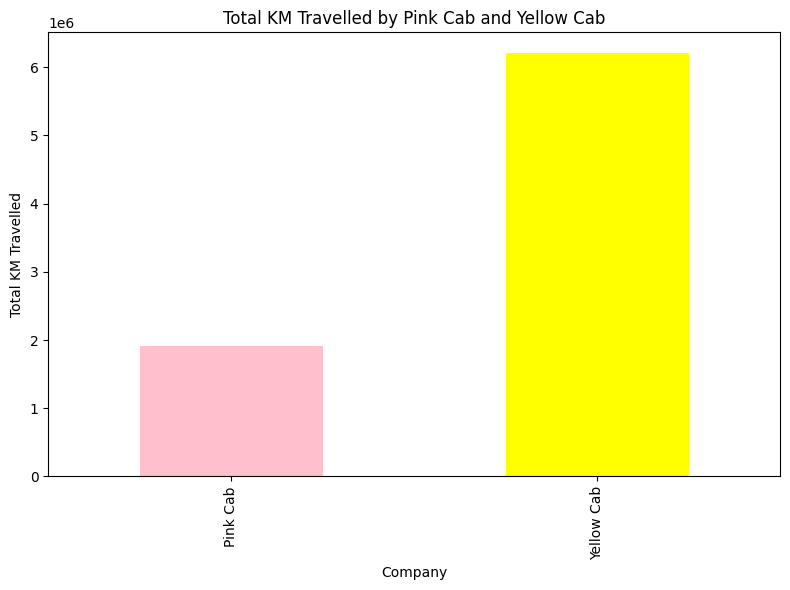

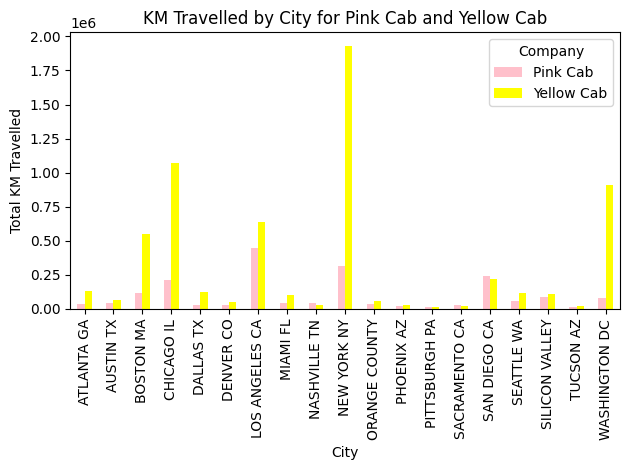

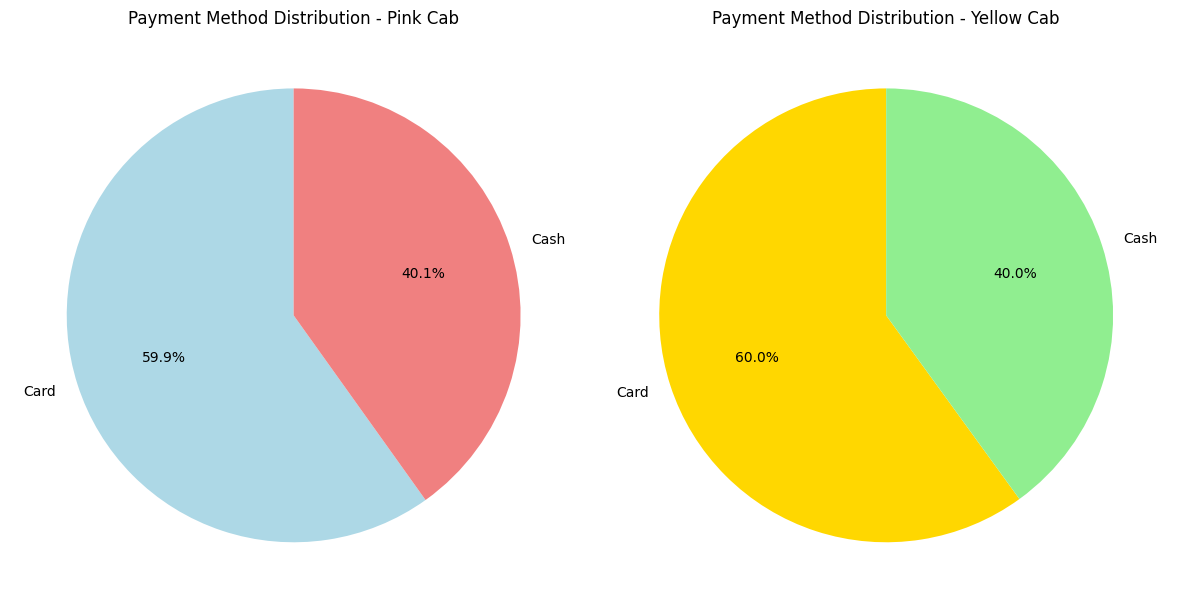

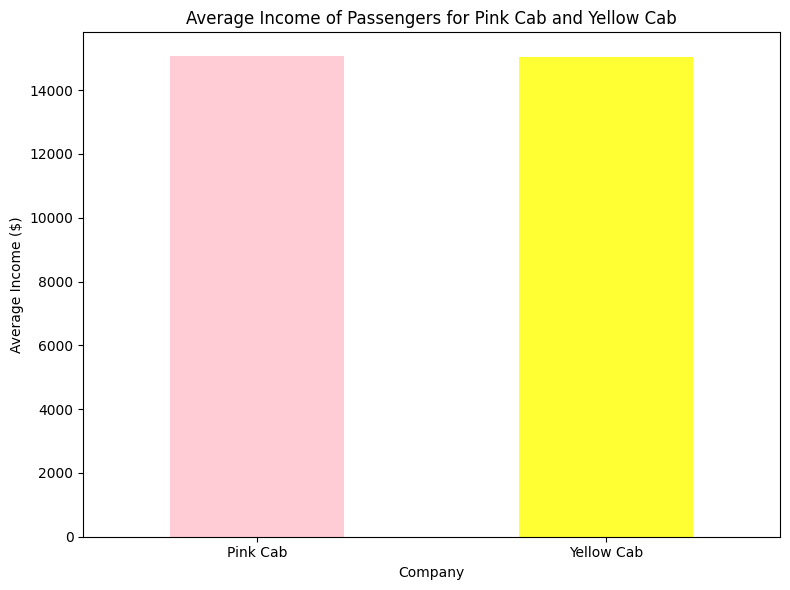

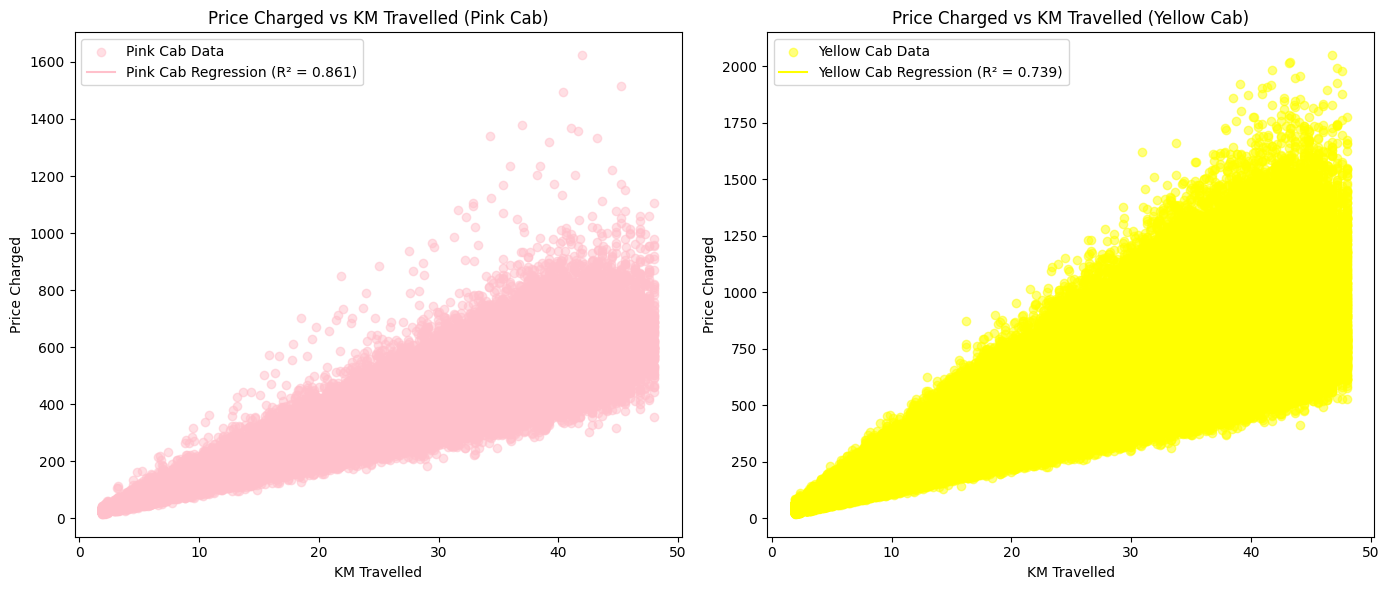

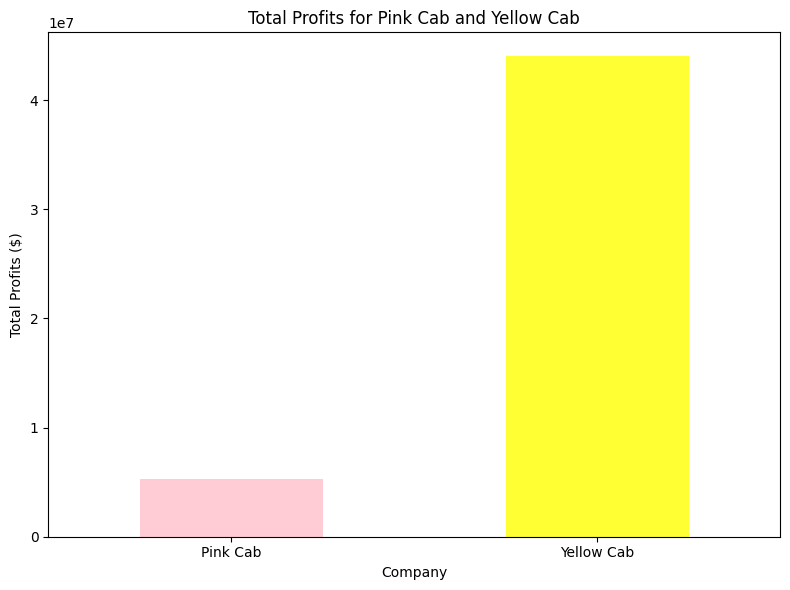

In [ ]:
# KM Travelled for each Company (Bar Graph)
totalKM = masterData.groupby("Company")["KM Travelled"].sum()

plt.figure(figsize = (8, 6))
totalKM.plot(kind = "bar", color = ["pink", "yellow"])

plt.xlabel("Company")
plt.ylabel("Total KM Travelled")
plt.title("Total KM Travelled by Pink Cab and Yellow Cab")
plt.tight_layout()

plt.show()

# City for each Company (Bar Graph)
cityCompanyData = masterData.groupby(["City", "Company"])["KM Travelled"].sum().unstack()

cityCompanyData.plot(kind = "bar", color = ["pink", "yellow"])
plt.xlabel("City")
plt.ylabel("Total KM Travelled")
plt.title("KM Travelled by City for Pink Cab and Yellow Cab")
plt.legend(title = "Company")
plt.tight_layout()

plt.show()

# Payment Mode for each Company (Pie Chart)
pinkPayment = masterData[masterData["Company"] == "Pink Cab"]["Payment_Mode"].value_counts(normalize = True) * 100
yellowPayment = masterData[masterData["Company"] == "Yellow Cab"]["Payment_Mode"].value_counts(normalize = True) * 100

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.pie(pinkPayment, labels = pinkPayment.index, autopct = "%1.1f%%", colors = ["lightblue", "lightcoral"], startangle = 90)
plt.title("Payment Method Distribution - Pink Cab")

plt.subplot(1, 2, 2)
plt.pie(yellowPayment, labels = yellowPayment.index, autopct = "%1.1f%%", colors = ["gold", "lightgreen"], startangle = 90)
plt.title("Payment Method Distribution - Yellow Cab")

plt.tight_layout()
plt.show()

# Income of Customer for each Company (Bar Graph)
averageIncome = masterData.groupby("Company")["Income (USD/Month)"].mean()

plt.figure(figsize = (8, 6))
averageIncome.plot(kind = "bar", color = ["pink", "yellow"], alpha = 0.8)

plt.xlabel("Company")
plt.ylabel("Average Income ($)")
plt.title("Average Income of Passengers for Pink Cab and Yellow Cab")
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

# Price Charged for each Company (Scatter Plot)
pinkCabData = masterData[masterData["Company"] == "Pink Cab"]
yellowCabData = masterData[masterData["Company"] == "Yellow Cab"]

def plotLinearRegression(data, companyName, color):
    X = data["KM Travelled"].values.reshape(-1, 1)
    y = data["Price Charged"].values
    
    model = LinearRegression()
    model.fit(X, y)
    yPred = model.predict(X)
    
    rSquared = model.score(X, y)
    
    plt.scatter(X, y, label = f"{companyName} Data", alpha = 0.5, color = color)
    plt.plot(X, yPred, label = f"{companyName} Regression (R² = {rSquared:.3f})", color = color)
    plt.xlabel("KM Travelled")
    plt.ylabel("Price Charged")
    plt.title(f"Price Charged vs KM Travelled ({companyName})")
    plt.legend()

    return rSquared

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
pinkRSquared = plotLinearRegression(pinkCabData, "Pink Cab", "pink")

plt.subplot(1, 2, 2)
yellowRSquared = plotLinearRegression(yellowCabData, "Yellow Cab", "yellow")

plt.tight_layout()
plt.show()

# Profit for each Company (Bar Graph)
masterData["Profit"] = masterData["Price Charged"] - masterData["Cost of Trip"]
totalProfits = masterData.groupby("Company")["Profit"].sum()

plt.figure(figsize = (8, 6))
totalProfits.plot(kind = "bar", color = ["pink", "yellow"], alpha = 0.8)

plt.xlabel("Company")
plt.ylabel("Total Profits ($)")
plt.title("Total Profits for Pink Cab and Yellow Cab")
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

Recommendations:
I'd recommend to invest in Yellow Cab since they have proved in mutltiple bar graphs, pie charts and other visualizations that they are more dominant in important fields such as profitability, having a bigger name in the market, and a loyal customer base. Pink Cab, through statistical analysis, seems to be a newer company which is trying to increase their customer base and get a name in the market. This is very clear through how much Yellow Cab outweighs Pink Cab in many aspects, especially in profitability where Yellow Cab makes about 9 times more than Pink Cab.